# Read important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the dataset

In [2]:
df= pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Analysis of dataset

In [3]:
df.shape

(583, 11)

In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In the above above dataset we can notice some missing values!

# Finding the missing values

In [6]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Albumin_and_Globulin_Ratio    4
dtype: int64


We can just drop those specific row 

In [7]:
#drop missing row where missing value is present 
df = df.dropna()

In [8]:
df.shape

(579, 11)

Divide the GENDER into 0 or 1

In [9]:
#one hot encoding 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].astype('str'))

In [10]:
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Looking out for any correlations

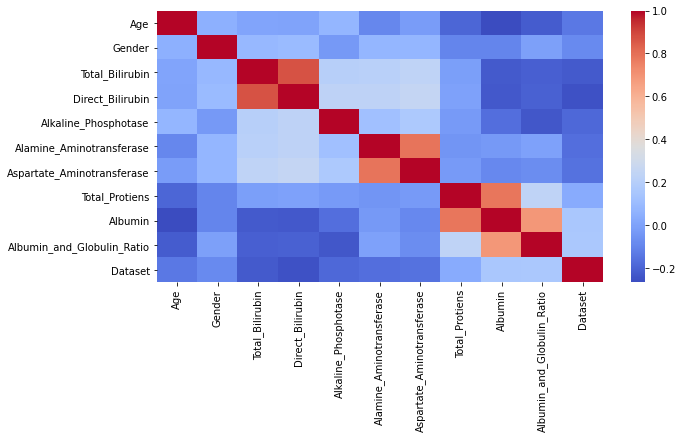

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

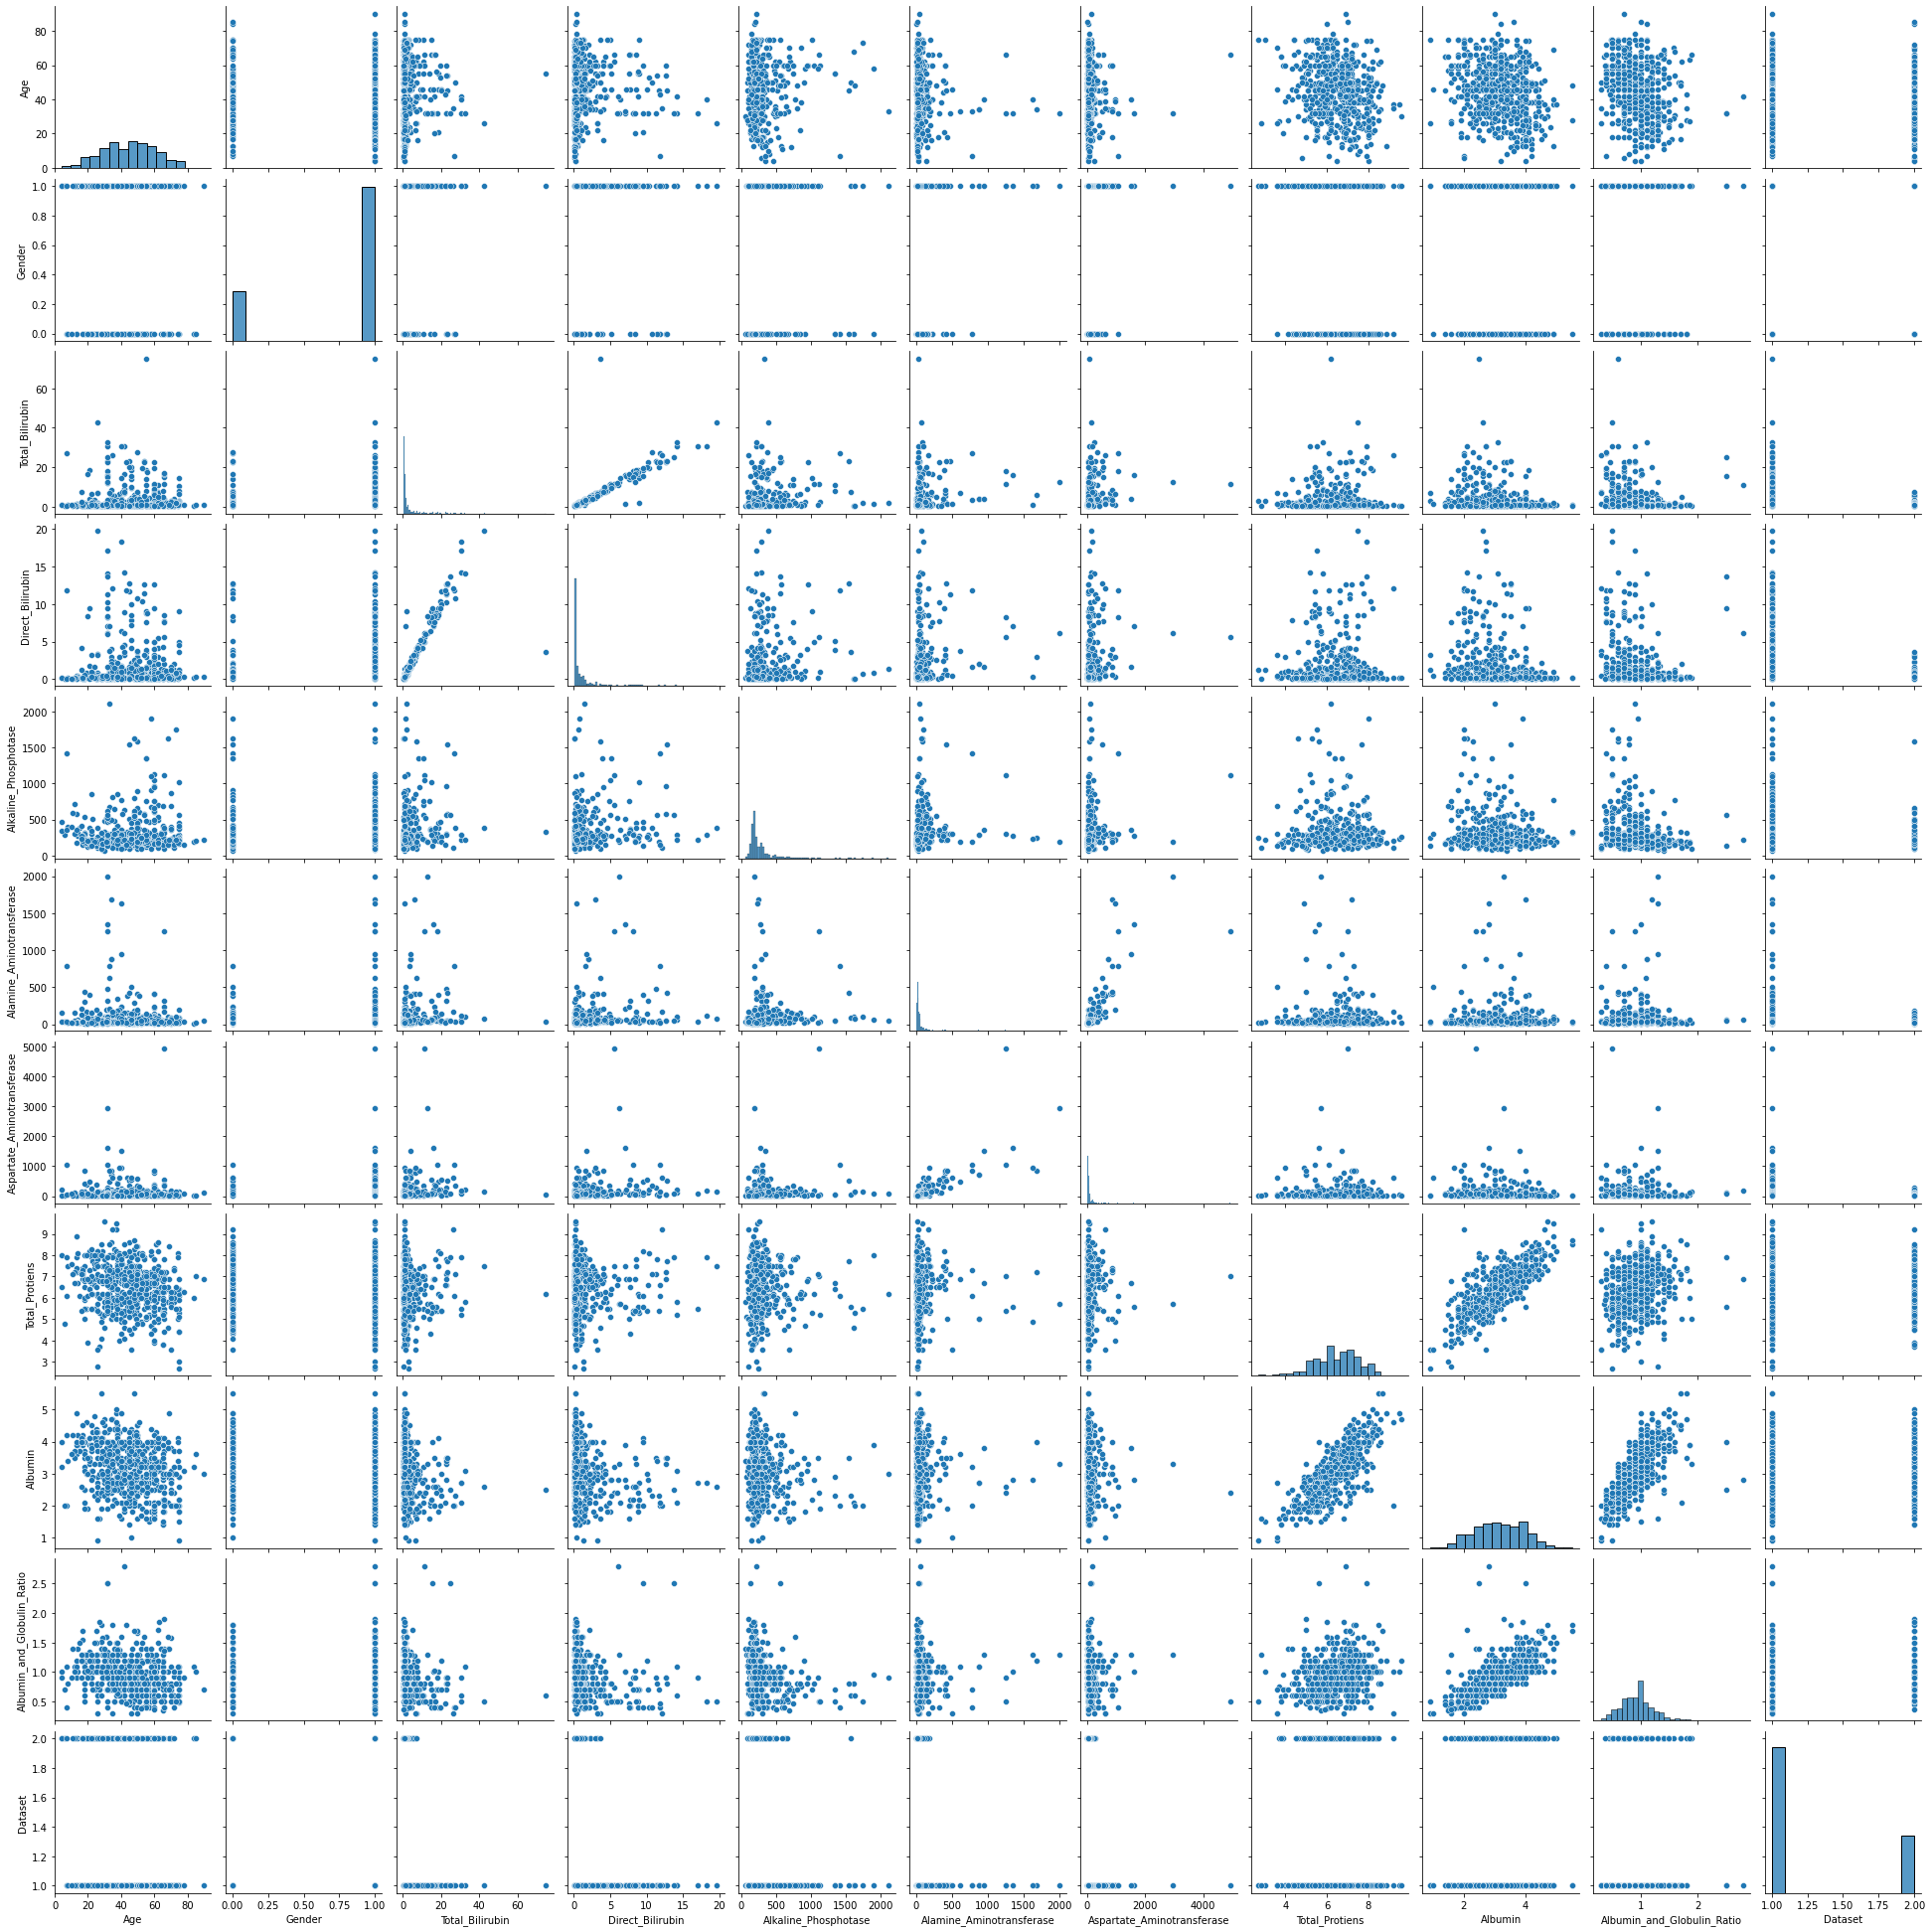

In [12]:
sns.pairplot(df)

# MODELLING

In [16]:
X=df.drop("Dataset",axis=1)
y=df["Dataset"]

## Scalling the data!!

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.247403,-1.770795,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390
1,1.062306,0.564718,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461
2,1.062306,0.564718,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707
3,0.815511,0.564718,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780
4,1.679294,0.564718,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=0)

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model= KNN()   
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
prediction=model.predict(x_test)

In [29]:
#find accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.6388888888888888


In [30]:
#accuracy of train data
print(accuracy_score(y_train,model.predict(x_train)))

0.7894736842105263


# MODEL EVALUATION!

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[102,  25],
       [ 40,  13]])

In [32]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.72      0.80      0.76       127
           2       0.34      0.25      0.29        53

    accuracy                           0.64       180
   macro avg       0.53      0.52      0.52       180
weighted avg       0.61      0.64      0.62       180

